In [180]:
%run -i ch04.py

<Figure size 432x288 with 0 Axes>

In [181]:
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from sklearn.linear_model import LinearRegression

from models import LinearRegressionModel
from pipelines import NumericPipeline
from const import PATH_SCREENSHOTS

In [182]:
theta = [4, 3]
count = 100
X, y = generate_data(theta, count)

In [183]:
theta = linear_fit(X, y)
theta

array([[4.2151],
       [2.7701]])

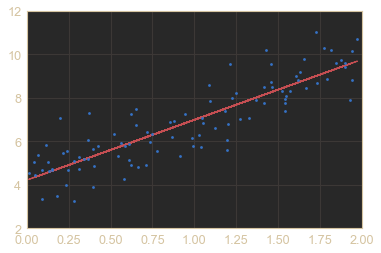

In [184]:
y_ = linear_predict(X, theta)
plt.plot(X, y_, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 2, 12])
plt.show()

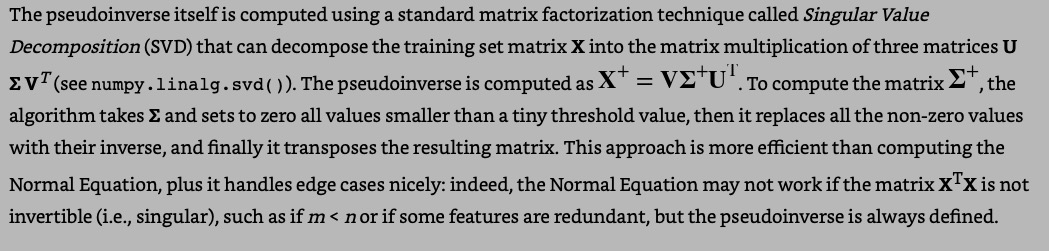

In [185]:
Image(f'{PATH_SCREENSHOTS}/ch04/svd_vs_ne.jpg', width=700)

<models.LinearRegressionModel object at 0x11f316e10>: LinearRegression,
size: 100, rmse: 0.90, mean: 0.90, std: 0.19,
theta: [4.2151, 2.7701], residuals: [80.6585], sigmas: [14.3702, 4.1196]


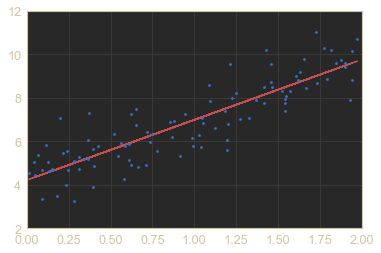

In [186]:
lr = LinearRegressionModel(LinearRegression)
lr.evaluate(*(X, y))
print(repr(lr))

plt.plot(X, lr.predictions, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 2, 12])
plt.show()

In [220]:
frame = pd.DataFrame(np.c_[X, y])
Xy = NumericPipeline(frame).fit_transform(frame)
Xy.shape
X_ = Xy[:,:-1]
y_ = Xy[:,-1]

<models.LinearRegressionModel object at 0x11fc89828>: LinearRegression,
size: 100, rmse: 0.48, mean: 0.48, std: 0.10,
theta: [-0.0000, 0.8771], residuals: [23.0726], sigmas: [10.0000, 10.0000]


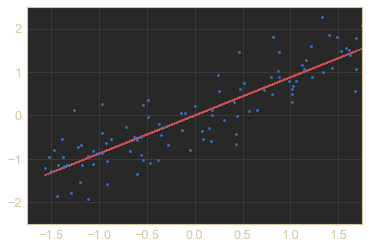

In [223]:
lrs = LinearRegressionModel(LinearRegression)
lrs.evaluate(*(X_, y_))
print(repr(lrs))

plt.plot(X_, lrs.predictions, 'r-')
plt.plot(X_, y_, 'b.')
plt.axis([-1.75, 1.75, -2.5, 2.5])
plt.show()

In [244]:
samples = np.array([range(-5, 5)], dtype=float).T 
pred = lr.model.predict(samples)
preds = lrs.model.predict(samples)
import math
view = np.c_[samples, pred.round(4), preds.round(4)]
frame = pd.DataFrame(view)
frame.columns = ['Sample', 'Pred', 'Preds']
frame

,Sample,Pred,Preds
0,-5.0,-9.6355,-4.3854
1,-4.0,-6.8654,-3.5083
2,-3.0,-4.0952,-2.6312
3,-2.0,-1.3251,-1.7542
4,-1.0,1.4450,-0.8771
5,0.0,4.2151,-0.0000
6,1.0,6.9852,0.8771
7,2.0,9.7553,1.7542
8,3.0,12.5254,2.6312
9,4.0,15.2955,3.5083
